# More examples for clustering

### Helper functions

In [14]:
import numpy as np

def load_labeled_data(filename):
    X = []
    y = []
    with open(filename) as fp:
        for line in fp:
            temp = line.split()
            X.append(temp[:-1])
            y.append(temp[-1])
    return np.array(X, dtype = float), np.array(y, dtype = float)

def load_unlabeled_data(filename):
    X = []
    with open(filename) as fp:
        for line in fp:
            X.append(line.split())
    return np.array(X, dtype = float)

In [15]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_unlabeled(X):
    fig = plt.figure(figsize = (10,10))
    plt.scatter(X[:,0], X[:,1],s=10)
    plt.show()
    return

def plot_labeled(X,y):
    fig = plt.figure(figsize = (10,10))
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_3D_unlabeled(X):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
    plt.show()
    return

def plot_3D_labeled(X,y):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')

    
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], X[y == cl, 2],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_MNIST(X):    
    plt.imshow(X.reshape(28, 28))
    plt.show()
    return

### Datasets provided to you
* data/labeled_Aggregation.txt
* data/labeled_Compound.txt
* data/labeled_D31.txt
* data/labeled_Spiral.txt
* data/unlabeled_ConfLongDemo.txt
* data/unlabeled_Unbalanced.txt


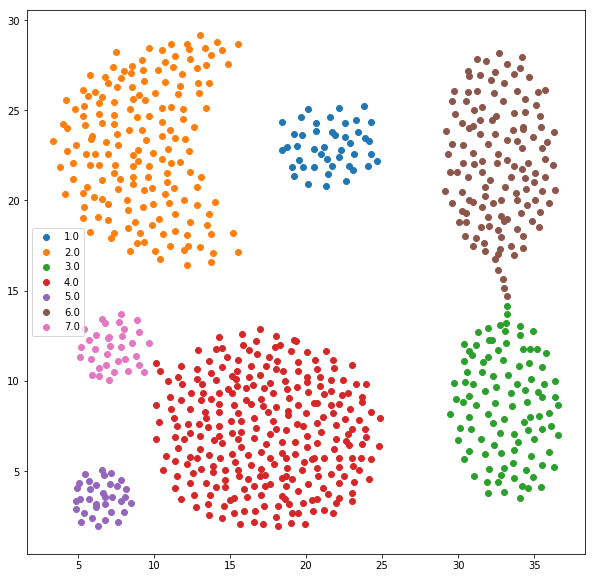

In [16]:
# Load data
X,y = load_labeled_data("data/labeled_Aggregation.txt")
plot_labeled(X,y)

# X = load_unlabeled_data("data/unlabeled_Unbalanced.txt")

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import DBSCAN

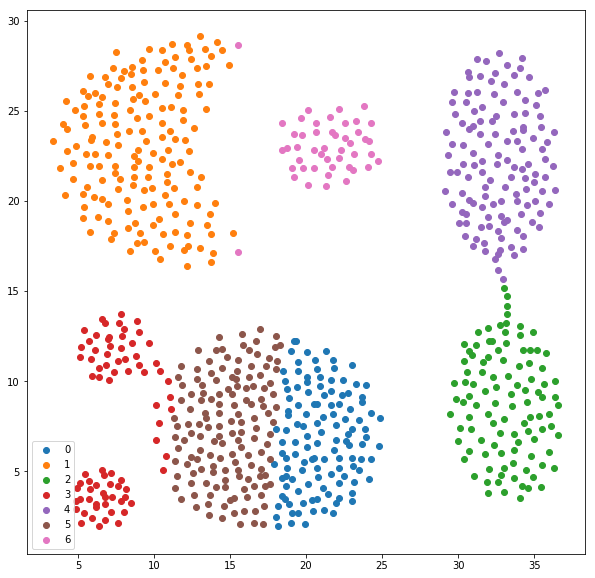

In [18]:
# k-means with 7 clusters
model = KMeans(n_clusters = 7)
model.fit(X)
labels = model.predict(X)
plot_labeled(X, labels)

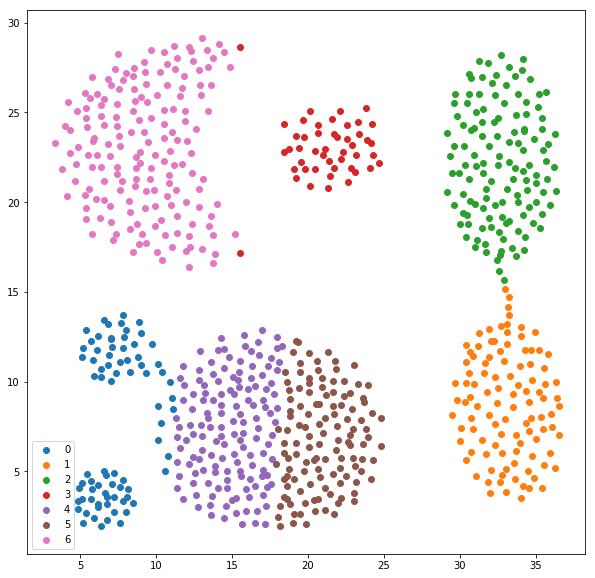

In [21]:
model = KMeans(n_clusters = 7)
model.fit(X)
labels = model.predict(X)
plot_labeled(X, labels)

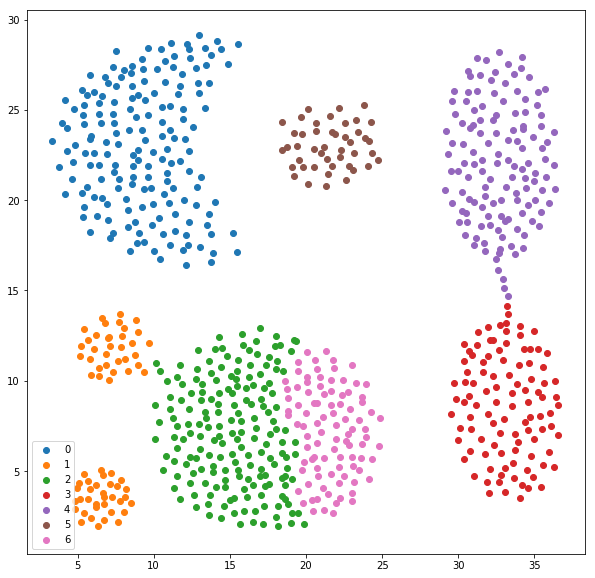

In [24]:
# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters = 7)
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)

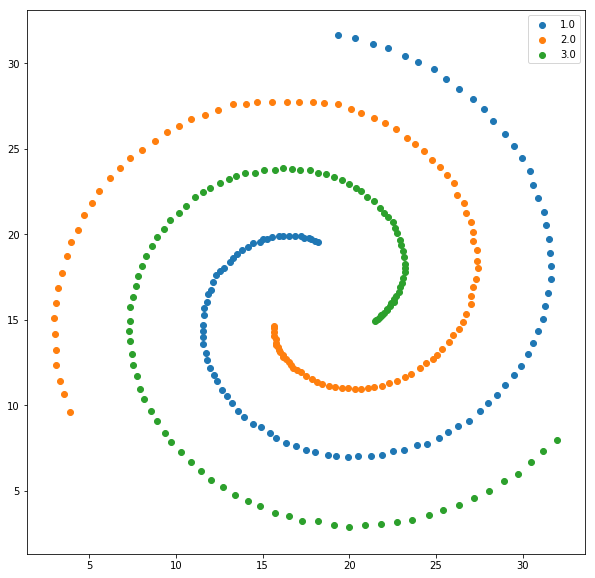

In [25]:
# Different dataset
X,y = load_labeled_data("data/labeled_Spiral.txt")
plot_labeled(X,y)

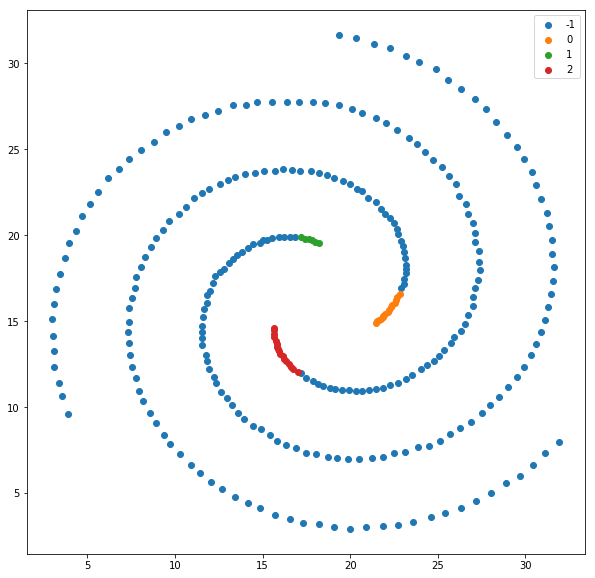

In [26]:
# DBSCAN
model = DBSCAN()
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)

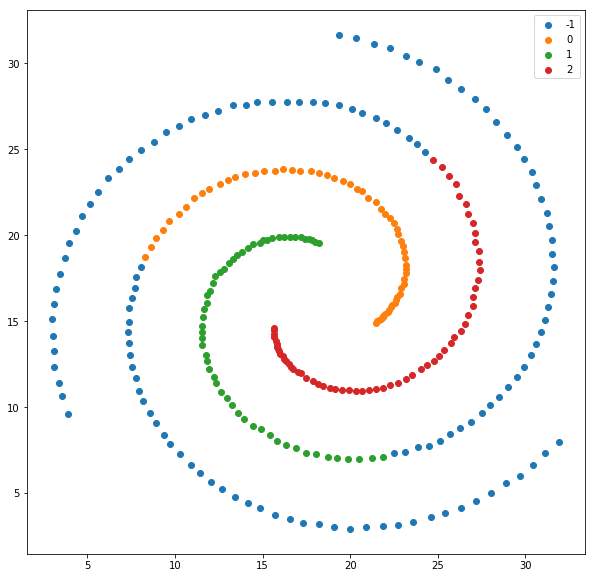

In [29]:
# tuning DBSCAN hyper parameters
model = DBSCAN(min_samples = 10, eps = 3)
model.fit(X)
labels = model.labels_
plot_labeled(X,labels)

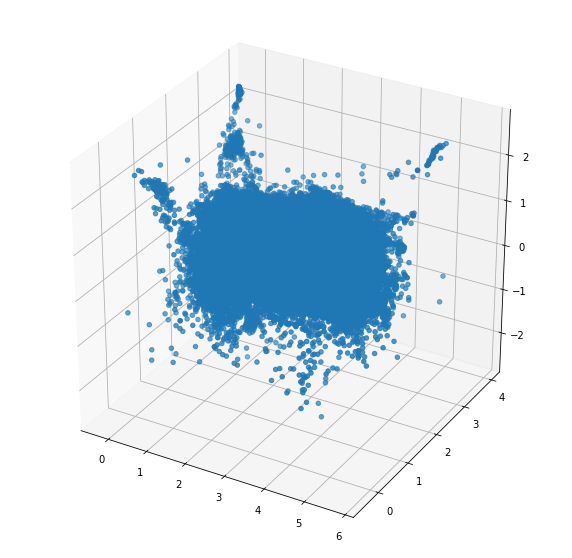

In [30]:
# 3D dataset
X = load_unlabeled_data("data/unlabeled_ConfLongDemo.txt")
plot_3D_unlabeled(X)

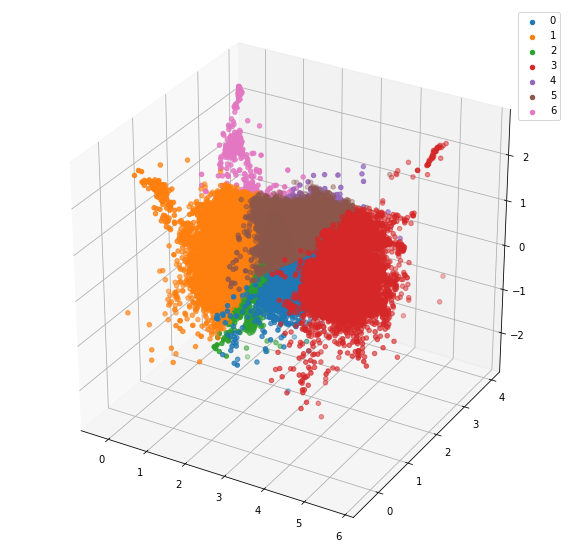

In [31]:
# clustering with k-means
model = KMeans(n_clusters = 7)
model.fit(X)
labels = model.predict(X)
plot_3D_labeled(X, labels)

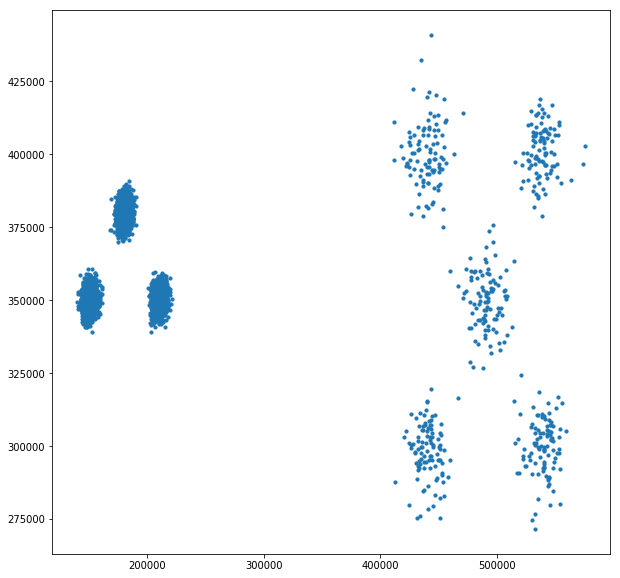

In [33]:
X = load_unlabeled_data("data/unlabeled_Unbalanced.txt")
plot_unlabeled(X)

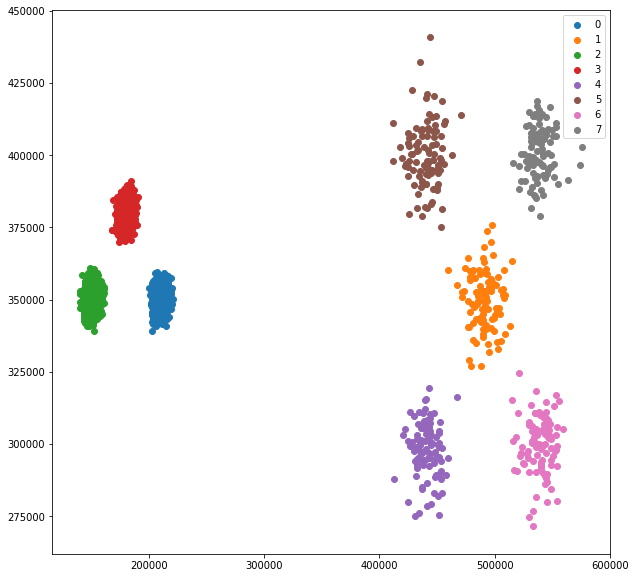

In [36]:
# KMeans
model = KMeans(n_clusters = 8)
model.fit(X)
labels = model.predict(X)
plot_labeled(X, labels)

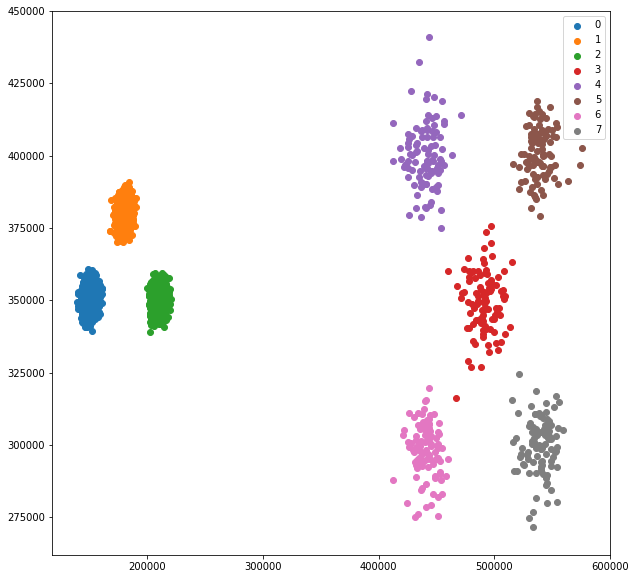

In [37]:
# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters = 8)
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)

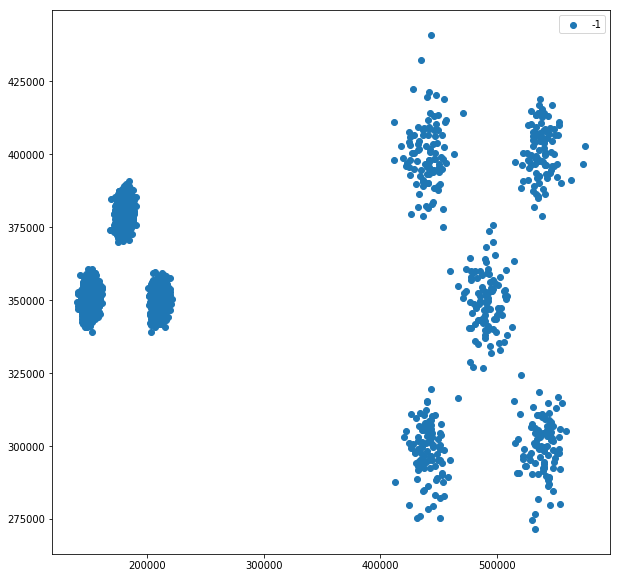

In [38]:
# DBSCAN
model = DBSCAN()
model.fit(X)
labels = model.labels_
plot_labeled(X,labels)

# Short introduction to dimension reduction


Dimension reduction: reducing the dimension of the feature space for analysis or visualization

* Feature Elimination: reduce the feature space by eliminating features
* Feature Extraction: create “new” features, where each “new” feature is a combination of each of “old” features in a specific way. We keep as many of the new features as we want, and drop the “least important ones.”

### Principal Component Analysis

![](images/PCA_illustration.png)

Tutorial: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [48]:
# 3D dataset
X = load_unlabeled_data("data/unlabeled_ConfLongDemo.txt")
# plot_3D_unlabeled(X)

(164860, 2)


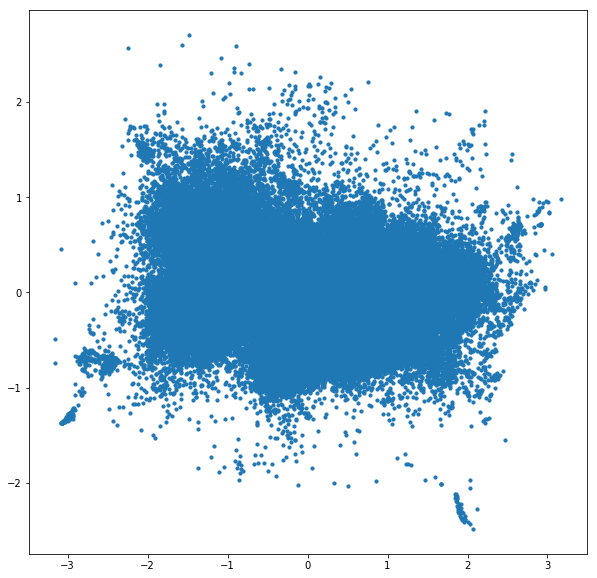

In [49]:
# PCA example with the 3D dataset
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)
X_transformed = model.transform(X)
print(X_transformed.shape)
plot_unlabeled(X_transformed)

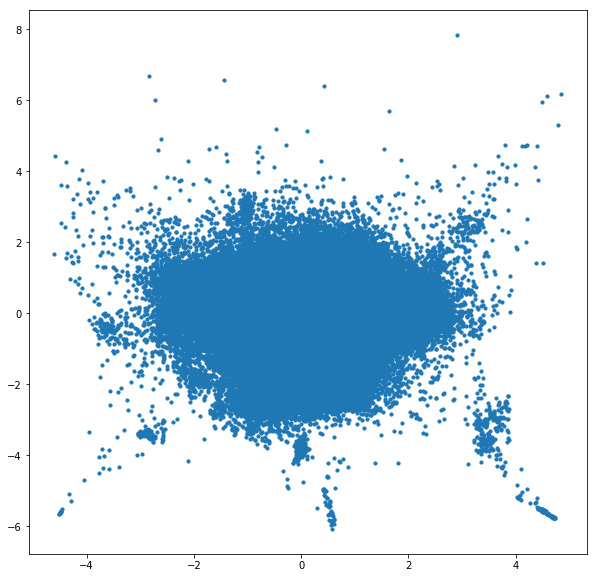

In [50]:
# PCA example with the 3D dataset with normalization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
standscaler = StandardScaler()
standscaler.fit(X)
X_scaled = standscaler.transform(X)

model = PCA(n_components = 2)
model.fit(X_scaled)
X_transformed = model.transform(X_scaled)
plot_unlabeled(X_transformed)

In [51]:
print(model.explained_variance_ratio_)

[0.44883399 0.33497238]


In [52]:
print(model.components_)

[[-0.7070555   0.70715704  0.00119692]
 [-0.08391425 -0.08222134 -0.99307505]]


### MNIST Dataset

Dataset of handwritten digits. Each datapoint is a 28 * 28 image
![](images/MNIST.png)

In [53]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
X = mnist.train.images[:5000]
y = mnist.train.labels[:5000]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [54]:
X.shape

(5000, 784)

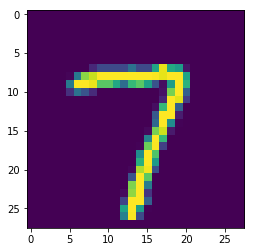

In [55]:
plot_MNIST(X[100])

(5000, 50)


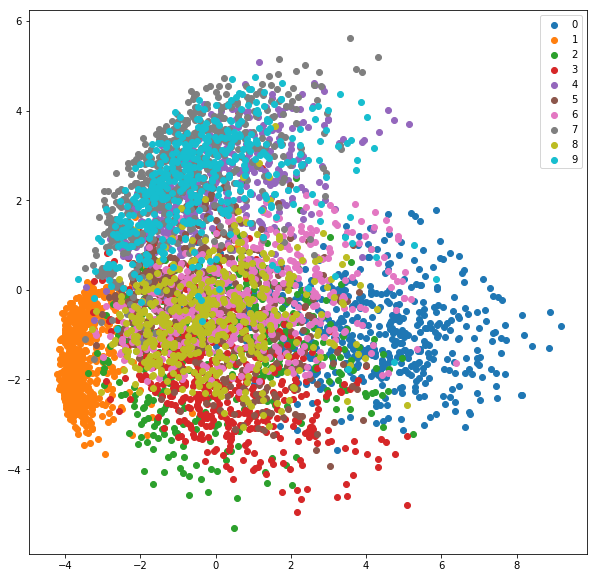

In [58]:
# MNIST with PCA (50 components)
from sklearn.decomposition import PCA
model = PCA(n_components=50)
model.fit(X)
X_transformed = model.transform(X)
print(X_transformed.shape)
plot_labeled(X_transformed, y)

In [59]:
print(model.explained_variance_ratio_)
print(sum(model.explained_variance_ratio_[:30]))

[0.1057592  0.07077187 0.06160966 0.05463362 0.04806109 0.04397979
 0.03221926 0.029696   0.02825221 0.0232357  0.0210507  0.02042647
 0.0172459  0.01682583 0.01610423 0.01531643 0.01285728 0.01260578
 0.01143338 0.01074917 0.01060954 0.01011594 0.009568   0.0090135
 0.00837172 0.00820731 0.00800263 0.00773395 0.00699232 0.00691694
 0.00647223 0.00626727 0.0059536  0.00579895 0.00551557 0.00541562
 0.00503908 0.00479632 0.00476129 0.00463822 0.00445276 0.00427614
 0.00402521 0.00395687 0.00366775 0.00353995 0.00349213 0.0034664
 0.00329345 0.003216  ]
0.7383654047735035


## Other methods
* https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd
* https://colah.github.io/posts/2014-10-Visualizing-MNIST/

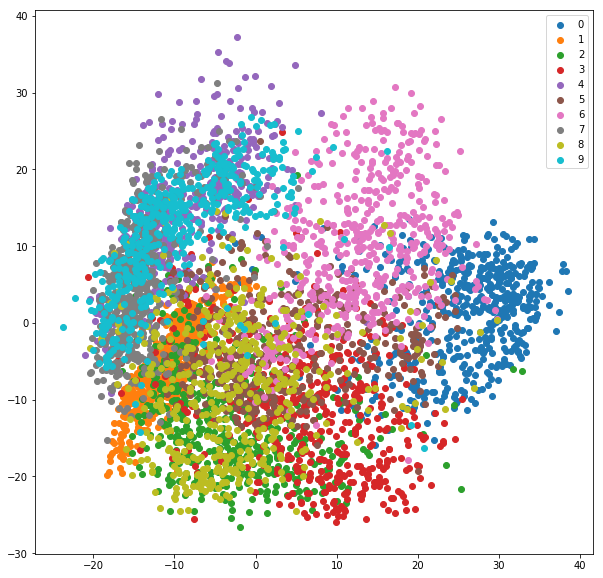

In [60]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2, n_neighbors = 5)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.250s...
[t-SNE] Computed neighbors for 5000 samples in 34.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.234141
[t-SNE] Computed conditional probabilities in 0.190s
[t-SNE] Iteration 50: error = 88.9130630, gradient norm = 0.0087071 (50 iterations in 4.139s)
[t-SNE] Iteration 100: error = 82.8095779, gradient norm = 0.0085420 (50 iterations in 6.565s)
[t-SNE] Iteration 150: error = 82.1495056, gradient norm = 0.0008102 (50 iterations in 3.809s)
[t-SNE] Iteration 200: error = 82.1183548, gradient norm = 0.0001899 (50 iterations in 3.629s)
[t-SNE] Iteration 250: error = 82.1189041, gradient norm = 0.000098

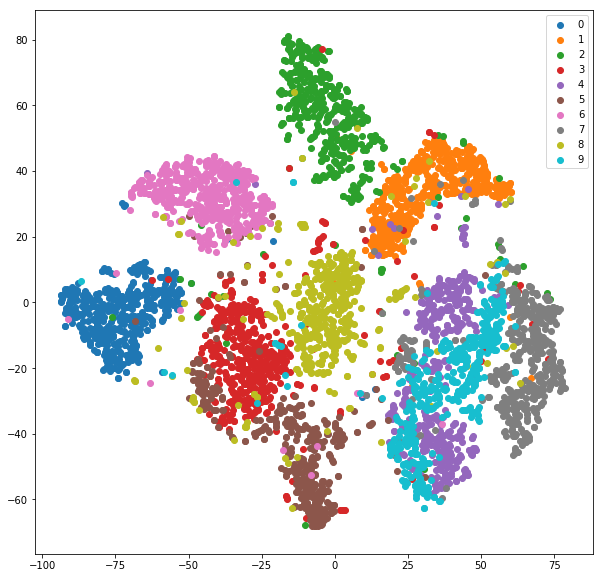

In [61]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,learning_rate=300,perplexity = 30, verbose = 3)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

# Q&A Session